In [1]:
import librosa
import os
import IPython.display as ipd 
import numpy as np 
import pandas as pd
from tqdm import tqdm
from glob import glob
import os
import random
from os.path import isdir, join
import regex as re
import gc
import pickle
import librosa
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch

In [2]:
def sample2melspectrogram(samples,sample_rate):
    melspectrogram = librosa.feature.melspectrogram(samples,sample_rate,center=False)
    melspectrogram = librosa.power_to_db(melspectrogram, ref=np.max)
    melspectrogram = (melspectrogram - melspectrogram.min()) / (melspectrogram.max() - melspectrogram.min())
    melspectrogram = melspectrogram[:80,:]
    return melspectrogram

In [3]:
train_audio_path = 'train/train/'
files = os.listdir(train_audio_path)

In [4]:
label_path = 'train/meta_train.csv'
label_df = pd.read_csv(label_path)
label_df.head()

Filename  Label   Remark
0  train_00001      0  Barking
1  train_00002      0  Barking
2  train_00003      0  Barking
3  train_00004      0  Barking
4  train_00005      0  Barking

In [5]:
label_df.Remark.unique()

array(['Barking', 'Howling', 'Crying', 'COSmoke', 'GlassBreaking',
       'Other', 'Vacuum', 'Blender', 'Electrics', 'Cat', 'Dishes'],
      dtype=object)

In [6]:
def plot_sample_by_class_name(class_name):
    try:
        plt.figure(figsize=(10,5))
        for i,filename in enumerate([i+'.wav' for i in label_df[label_df.Remark==class_name].sample(3)['Filename'].values]):
            samples, sample_rate = librosa.load(str(train_audio_path) + filename)
            plt.subplot(1,3,i+1)
            plt.plot(samples)
            title = 'class:{} filename:{}'.format(class_name,filename)
            plt.title(title)
        plt.tight_layout()
        plt.show()
    except:
        print(class_name)
        pass

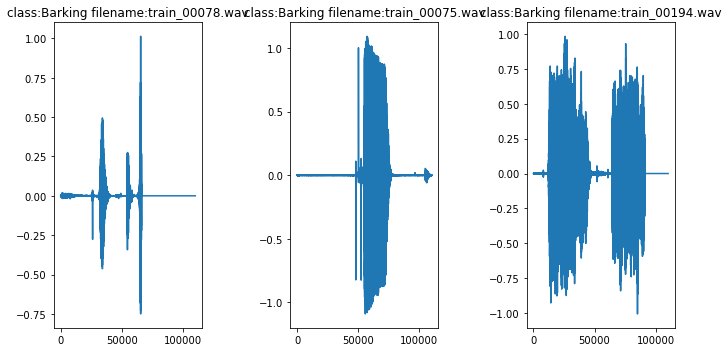

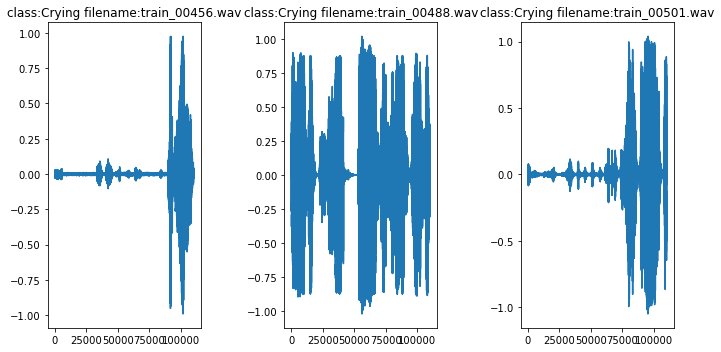

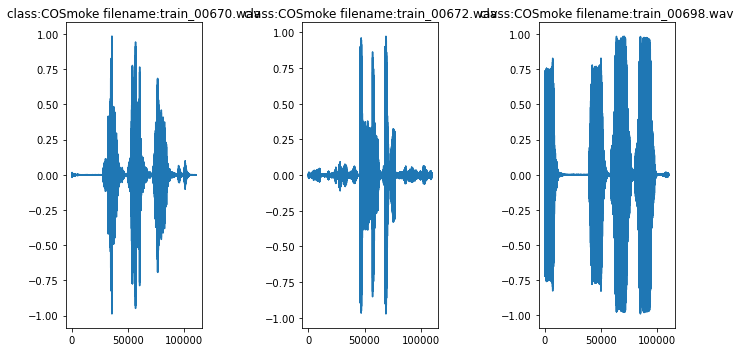

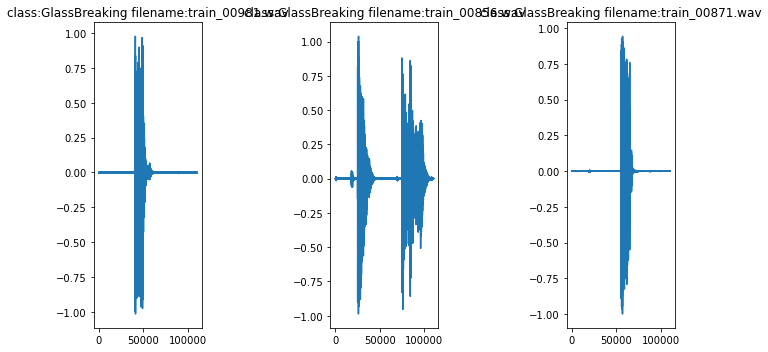

Other


<Figure size 720x360 with 0 Axes>

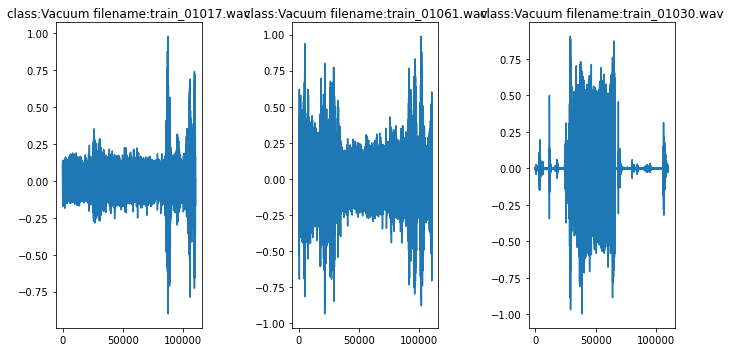

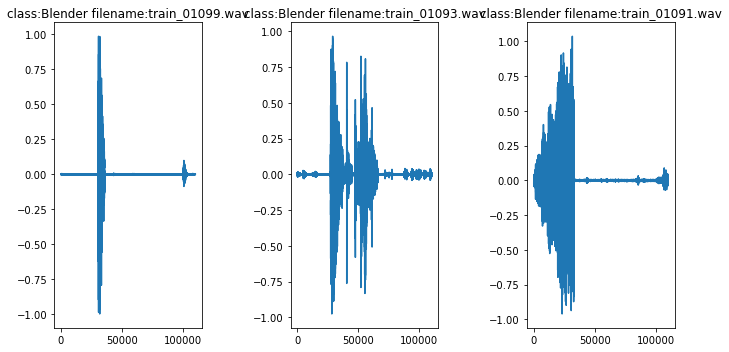

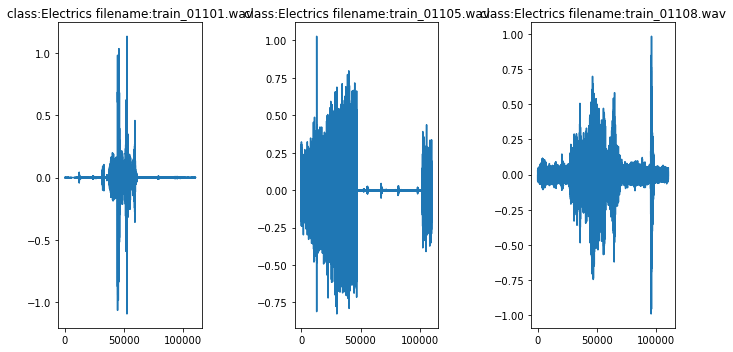

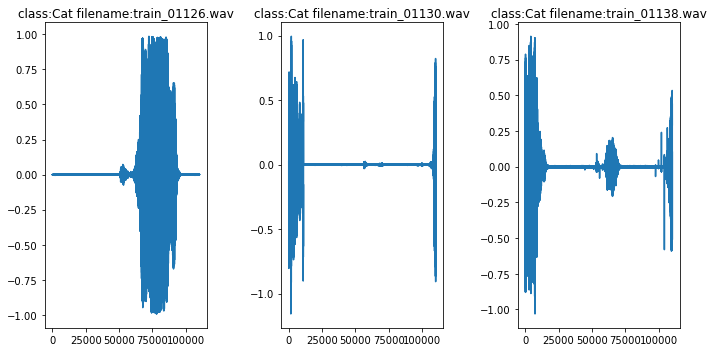

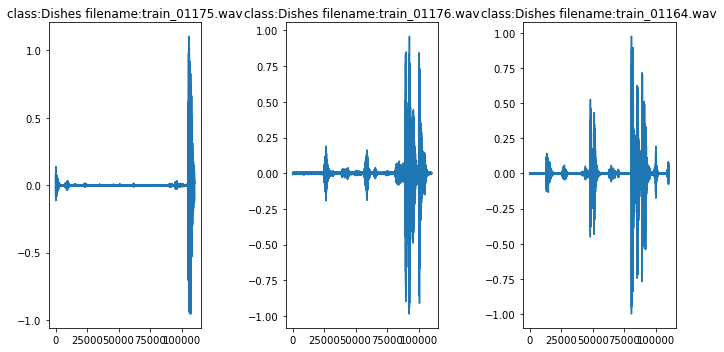

In [7]:
for class_name in label_df.Remark.unique():
    plot_sample_by_class_name(class_name)

In [8]:
def plot_melspectrogram_by_class_name(class_name):
    try:
        plt.figure(figsize=(10,5))
        for i,filename in enumerate([i+'.wav' for i in label_df[label_df.Remark==class_name].sample(3)['Filename'].values]):
            #===================================================================
            samples, sample_rate = librosa.load(str(train_audio_path) + filename)
            melspectrogram = sample2melspectrogram(samples,sample_rate)
            #===================================================================
            plt.subplot(1,3,i+1)
            plt.imshow(melspectrogram)
            title = 'class:{} filename:{}'.format(class_name,filename)
            plt.title(title)
            #===================================================================
        plt.tight_layout()
        plt.show()
    except:
        print(class_name)
        pass

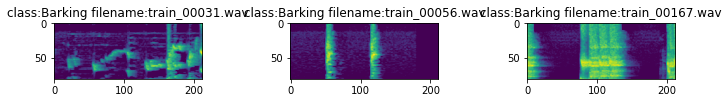

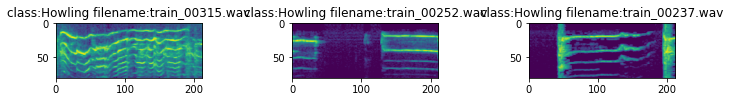

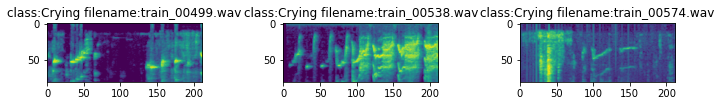

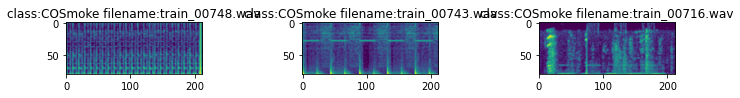

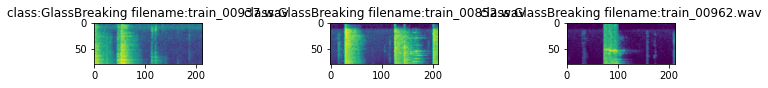

Other


<Figure size 720x360 with 0 Axes>

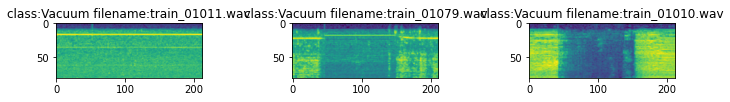

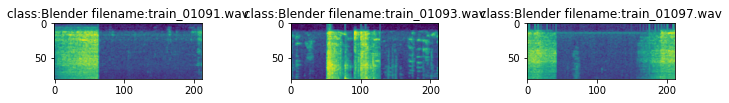

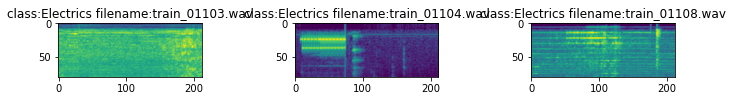

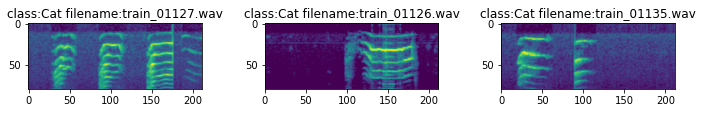

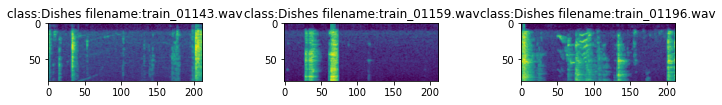

In [9]:
for class_name in label_df.Remark.unique():
    plot_melspectrogram_by_class_name(class_name)

In [10]:
def load_wav_file_as_model_input(wav_dir):
    files = os.listdir(wav_dir)
    X = torch.FloatTensor([])
    for f in tqdm(files[:]):
        try:
            audio, sampling_rate = librosa.load(wav_dir+f)
            mel_spectrogram = sample2melspectrogram(samples,sample_rate)
            shape = mel_spectrogram.shape
            mel_spectrogram = np.reshape(mel_spectrogram, (-1, shape[0], shape[1]))
            mel_spectrogram = torch.from_numpy(mel_spectrogram)
            X = torch.cat([X,mel_spectrogram],dim=0)
            #X = torch.cat([X,torch.unsqueeze(mel_spectrogram,0)],dim=0)
        except:
            print('the file:{} have problem'.format(f))
            pass   
    return X

In [11]:
def load_wav_file_as_model_input(wav_dir):
    files = os.listdir(wav_dir)
    X = torch.FloatTensor([])
    for f in tqdm(files[:5]):
        try:
            samples, sample_rate = librosa.load(wav_dir+f)
            mel_spectrogram = sample2melspectrogram(samples,sample_rate)
            shape = mel_spectrogram.shape
            mel_spectrogram = np.reshape(mel_spectrogram, (-1, shape[0], shape[1]))
            mel_spectrogram = torch.from_numpy(mel_spectrogram)
            X = torch.cat([X,torch.unsqueeze(mel_spectrogram,0)],dim=0)
        except:
            print('the file:{} have problem'.format(f))
    # X shape = batch,channel,length,width
    return X 

In [12]:
X = load_wav_file_as_model_input('train/train/')

100%|██████████| 5/5 [00:00<00:00,  7.21it/s]


In [13]:
X.shape

torch.Size([5, 1, 80, 212])